## Объектно-ориентированное программирование и информационная безопасность

*Валерий Семенов, Самарский университет*  
<h1 style="text-align:center">Библиотека <strong>seaborn</strong></h1>

<div style="text-align:center"><img src="seaborn.png"></div>

<div style="text-indent:30px; text-align:justify">Все функции построения графиков в библиотеке  Seaborn  можно разделить на несколько групп.</div> 
<div style="text-indent:30px; text-align:justify">Для демонстрации будем использовать данные, загружаемые с помощью функции  <strong>load_dataset()</strong>. В качестве аргумента будем использовать имя классического набора данных <strong>"penguins"</strong>:</div> 

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


***
> <h5 style="text-indent:30px; text-align:justify; background-color:LightGray">Рассматриваемый датасет содержит данные об измерениях размеров трех видов пингвинов, наблюдавшихся на трех островах архипелага Палмера в Антарктиде. Эти данные были собраны с 2007 по 2009 годы доктором Кристен Горман из Программы долгосрочных экологических исследований на американской полярной станции «Палмер». </h5>
***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<div style="text-indent:30px; text-align:justify">Как видим в датафрейме есть пропуски (отсутствующие данные).</div>
<div style="text-indent:30px; text-align:justify">В документации по библиотеке pandas есть целый <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html"><strong>раздел</strong></a>, посвященный отсутствующим данным. </div>
<div style="text-indent:30px; text-align:justify; margin-top: 20px">Самый простой подход при работе с отсутствующими данными – это удаление записей (строк) или полей (столбцов), в которых встречаются пропуски. Для того, чтобы удалить все объекты, которые содержат значения <strong>NaN</strong> воспользуйтесь методом <strong>dropna()</strong> без аргументов.</strong>: </div>

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<h2 style="text-align:center">Реляционные графики</h2>

<div style="text-indent:30px; text-align:justify">Реляционные графики нужны для визуализации  статистической или функциональной  зависимости  между переменными.</div>

<h3 style="text-align:center">Функция <strong>scatterplot()</strong></h3>

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

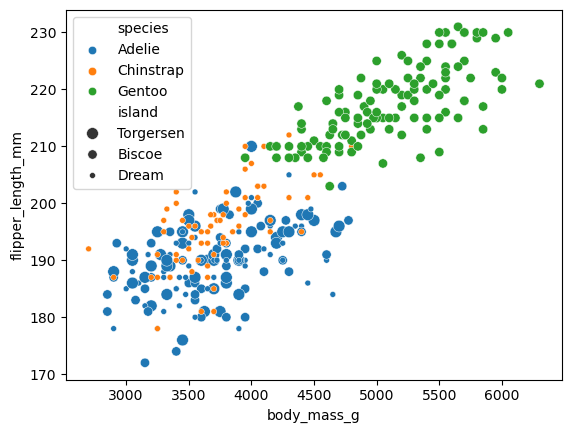

In [8]:
# Точечный график
sns.scatterplot(data=df, 
                x="body_mass_g",        # Масса тела
                y="flipper_length_mm",  # Длина крыльев (плавников)
                hue="species",          # Вид
                size="island")          # Остров

<h3 style="text-align:center">Функция <strong>lineplot()</strong></h3>

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

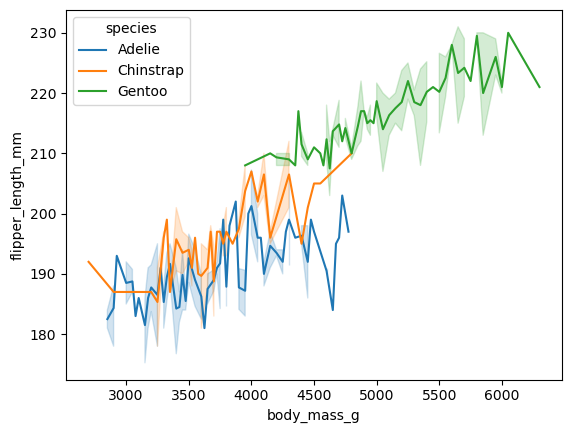

In [10]:
# Линейный график
sns.lineplot(data=df, 
             x="body_mass_g",       # Масса тела
             y="flipper_length_mm", # Длина крыльев (плавников)
             hue="species")         # Вид

<div style="text-indent:30px; text-align:justify">Важной особенностью функций построения графиков в Seaborn является то, что они делятся на два уровня абстрактности. Например, функции <strong>scatterplot()</strong> и  <strong>lineplot()</strong>  могут создавать только один график на уровне области Axes Matplotlib и принимают любые последовательности данных (списки, кортежи, массивы NumPy и одномерные объекты Series Pandas). </div>

<h3 style="text-align:center">Функция  <strong>relplot()</strong></h3>

<div style="text-indent:30px; text-align:justify">Но более абстрактная функция <strong>relplot()</strong> использует эти функции для создания многосегментных графиков и принимает данные только в виде объектов <strong>DataFrame</strong>. </div>
<div style="text-indent:30px; text-align:justify; margin-top: 20px">Благодаря функции  <strong>relplot()</strong> можно создавать, например вот такие графики:</div>

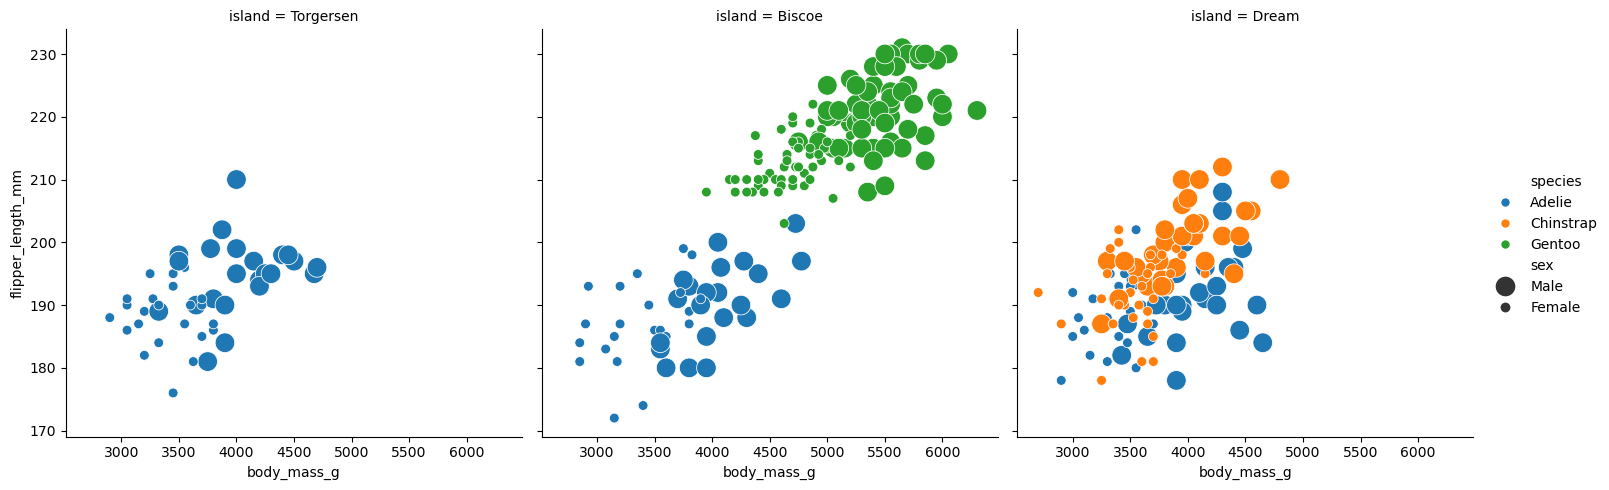

In [12]:
# Точечный график
sns.relplot(data=df, 
            x="body_mass_g",       # Масса тела
            y="flipper_length_mm", # Длина крыльев (плавников)
            hue="species",         # Вид
            col="island",          # Остров
            size="sex",            # Пол
            kind="scatter",
            sizes = (50, 200))

<div style="text-indent:30px; text-align:justify">Функция <strong>relplot()</strong> управляет графиком на уровне области <strong><i>Figure</i> Matplotlib</strong> и может располагать графики (области <strong><i>Axes</i></strong>) в несколько строк (параметр <strong>row</strong>) и(или) столбцов (параметр <strong>col</strong>). Выбрать тип графика, то есть указать какая функция <strong>scattrplot()</strong> или <strong>lineplot()</strong> будет использоваться для рисования графиков  можно с помощью параметра <strong>kind</strong> (он может принимать одно из двух возможных значений – <strong>"scatter"</strong> или <strong>"line"</strong>).</div>
<div style="text-indent:30px; text-align:justify">Также здесь мы использовали разбиение по цветам в зависимости от вида (параметр <strong>hue="species"</strong>) и задали разный размер точек в зависимости от пола (параметр <strong>size="sex"</strong>).</div>

<h2 style="text-align:center">Графики статистических распределений</h2>

<div style="text-indent:30px; text-align:justify">Графики распределений отражают статистическое распределение некоторой переменной или совместное распределение нескольких переменных. Самыми распространенными среди них являются  гистограммы  и  графики <a href="https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8"><strong>оценки плотности ядра (KDE)</strong></a>, а вот использование графиков <a href="https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F"><strong>эмпирической функции распределения вероятности (ECDF)</strong></a> можно встретить не так часто.</div>

<h3 style="text-align:center">Функция <strong>histplot()</strong></h3>

<Axes: xlabel='body_mass_g', ylabel='Count'>

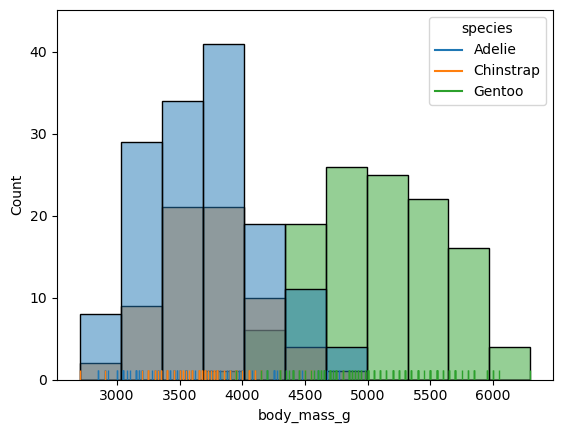

In [14]:
# Гистограмма
sns.histplot(data=df, x="body_mass_g", hue="species")
sns.rugplot(data=df,  x="body_mass_g", hue="species")

<h3 style="text-align:center">Функция <strong>kdeplot()</strong></h3>

<Axes: xlabel='body_mass_g', ylabel='Density'>

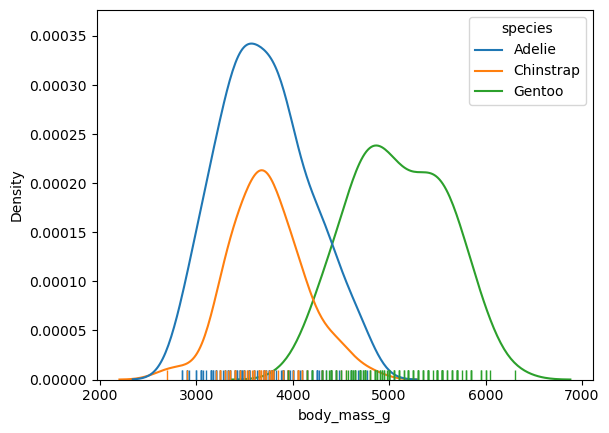

In [16]:
# KDE
sns.kdeplot(data=df, x="body_mass_g", hue="species")
sns.rugplot(data=df, x="body_mass_g", hue="species")

<h3 style="text-align:center">Функция <strong>ecdfplot()</strong></h3>

<Axes: xlabel='body_mass_g', ylabel='Proportion'>

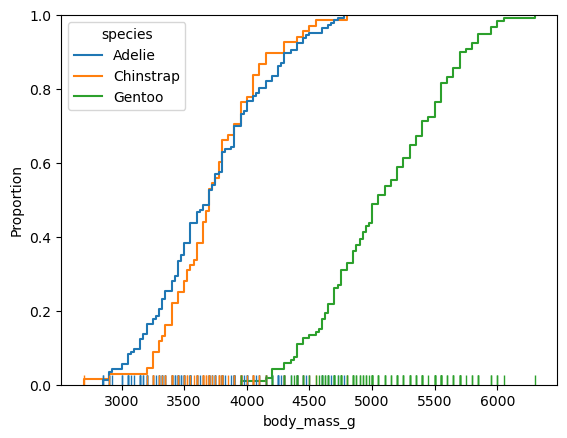

In [18]:
# ECDF
sns.ecdfplot(data=df, x="body_mass_g", hue="species")
sns.rugplot(data=df, x="body_mass_g", hue="species")

<div style="text-indent:30px; text-align:justify">На всех этих трех рисунках присутствует еще один вспомогательный вид графика, являющийся результатом функции <strong>rugplot()</strong>. Он изображает точки наблюдений в виде маленьких полосок около горизонтальной числовой оси.</div>
<div style="text-indent:30px; text-align:justify; margin-top: 20px">Гистограммы и KDE-графики могут также отражать характер совместного распределения сразу двух величин:</div>

<h3 style="text-align:center">Функция <strong>histplot()</strong></h3>

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

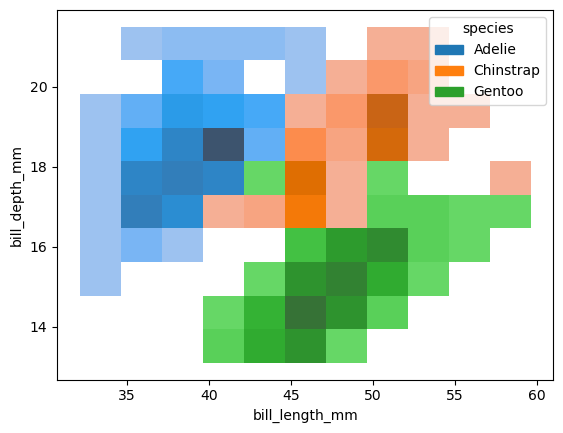

In [21]:
# Гистограмма
sns.histplot(data=df, 
             x="bill_length_mm", # Длина клюва
             y="bill_depth_mm",  # Высота клюва
             hue="species")      # Вид

<h3 style="text-align:center">Функция <strong>kdeplot()</strong></h3>

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

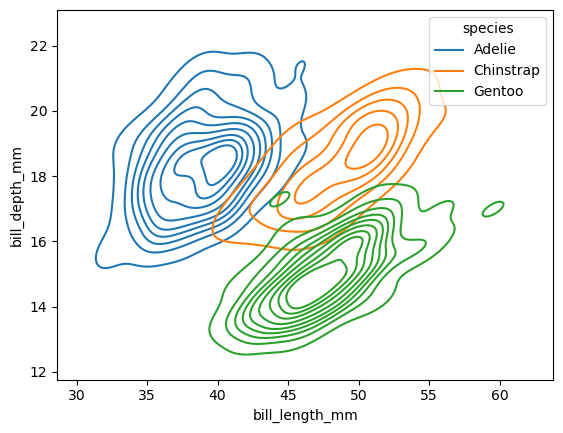

In [23]:
# KDE
sns.kdeplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

<h3 style="text-align:center">Функция <strong>displot()</strong></h3>
<div style="text-indent:30px; text-align:justify">Не путайте функцию <span style="color:red; font-size:larger; font-weight:bold; ; text-decoration: line-through">distplot()</span> с функцией <span style="font-size:larger; font-weight:bold">displot()</span>!</div>
<div style="text-indent:30px; text-align:justify">На многих интернет-ресурсах вы все еще можете встретить примеры с использованием функции <span style="color:red; font-size:larger; font-weight:bold; ; text-decoration: line-through">distplot()</span>. При запуске программы с этой функцией вы получите ошибку.</div>
<div style="text-indent:30px; text-align:justify">Функция <strong>displot()</strong> - это обновленная функция distplot() с улучшенными возможностями, а функция  distplot() устарела, начиная с версии 0.11.</div>

<div style="text-indent:30px; text-align:justify; margin-top: 20px">Функция <strong>displot()</strong> предназначена для визуализации распределений одномерных наборов данных. Диаграмма, которую она строит, может иметь различный вид и состоять из различных компонентов.</div>
<div style=" margin-left:50px">
<li style="text-align:justify">результат работы функции <strong>hist()</strong>     из Matplotlib (по умолчанию);</li>
<li style="text-align:justify">результат работы функции <strong>kdeplot()</strong>  из seaborn (параметр <strong>kind="kde"</strong> или <strong>kde=True</strong>);</li>
<li style="text-align:justify">результат работы функции <strong>ecdfplot()</strong> из seaborn (параметр <strong>kind="ecdf"</strong>);</li>
<li style="text-align:justify">результат работы функции <strong>rugplot()</strong>  из seaborn (параметр <strong>rug=True</strong>).</li>    
</div>

<h4 style="text-align:center">Гистограмма</h4>

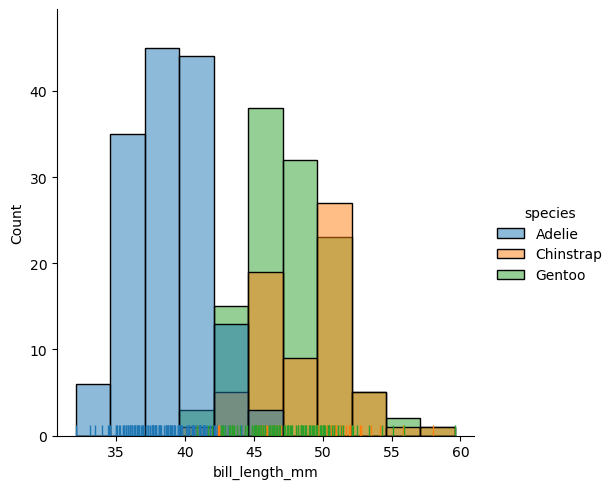

In [25]:
# Displot = гистограмма по умолчанию
sns.displot(data=df, x="bill_length_mm", hue="species", rug=True)

<h4 style="text-align:center">Плотность ядра (KDE)</h4>

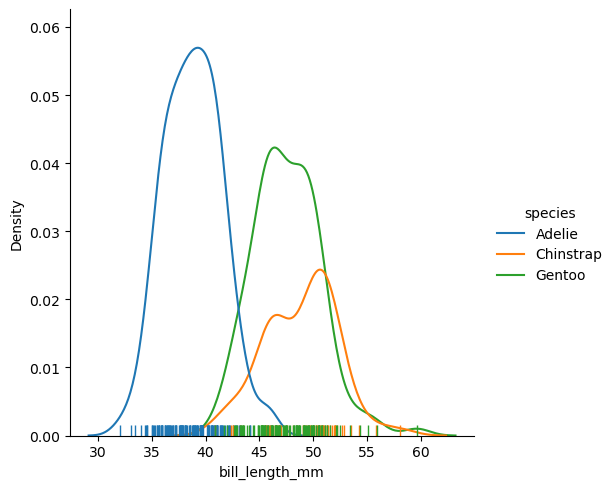

In [27]:
sns.displot(data=df, x="bill_length_mm", hue="species", rug=True, kind="kde")

<h4 style="text-align:center">Эмпирическая функции распределения вероятности (ECDF)</h4>

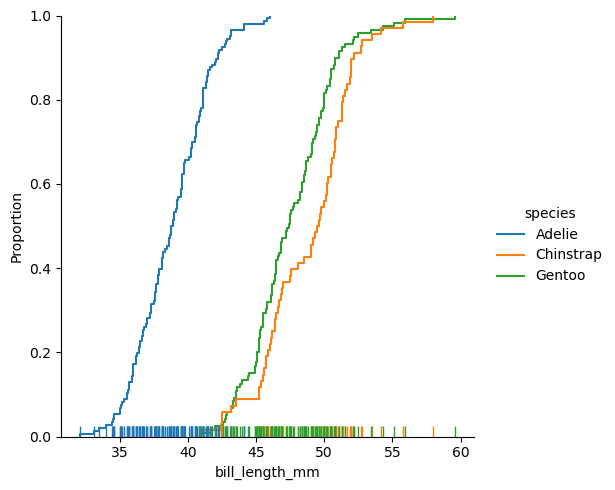

In [29]:
sns.displot(data=df, x="bill_length_mm", hue="species", rug=True, kind="ecdf")

<h4 style="text-align:center">Гистограмма с добавленной плотностью ядра (KDE)</h4>

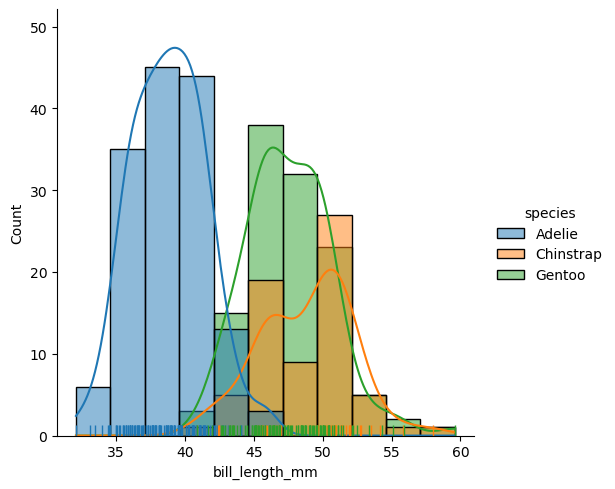

In [31]:
sns.displot(data=df, x="bill_length_mm", hue="species", rug=True, kde=True)